<a href="https://colab.research.google.com/github/alekstoteles/UCB/blob/master/alexander_mueller_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [0]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

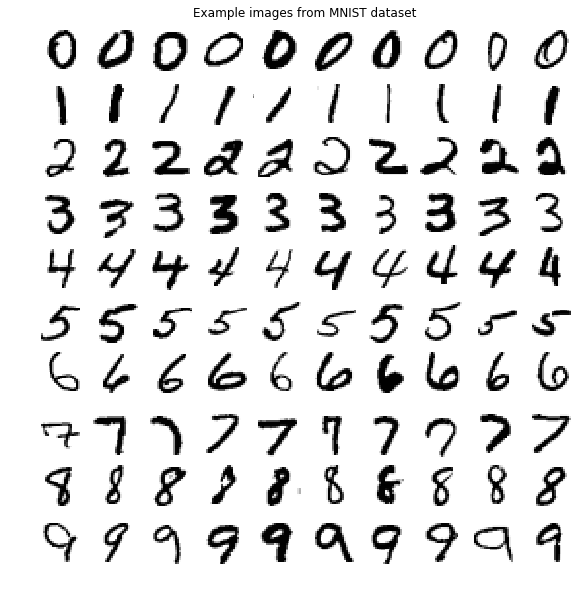

In [0]:
def P1(num_examples=10):

### STUDENT START ###

  # Create an empty array to store image data, sorted by digit
  digit_entries = np.empty((0, 784))
  # Iterate through digits 0-9
  for number in range(0,num_examples):
    # Boolean filter to locate digits (from the labels)
    filter_array = (mini_train_labels == str(number))
    # Apply boolean filter to training data, and append the first 10 entries
    filtered_array = mini_train_data[filter_array][:num_examples]
    digit_entries = np.append(digit_entries, filtered_array, axis=0)
  # Reshape vector into 2D matrix for rendering
  images = [item.reshape(28,28) for item in digit_entries]
  row_images = [] 
  # Data selection and transformation for visualization
  for row in range(num_examples):
    rimages = images[row * num_examples : (row + 1) * num_examples]
    row_images.append(np.concatenate(rimages, axis = 1))    
  image = np.concatenate(row_images, axis = 0) 
  plt.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')
  plt.title("Example images from MNIST dataset")
  plt.axis('off')
  return
plt.figure(figsize=(10,10))

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [0]:
def P2(k_values):

### STUDENT START ###
  # Accuracy score calculation
  print("Accuracy scores for classifier KNN")
  for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(mini_train_data, mini_train_labels)
    print("Accuracy score for k={}: {}".format(k, neigh.score(dev_data, dev_labels)))
  # Classification report
  print("\n\nClassification report for classifier KNN (k=1)")
  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(mini_train_data, mini_train_labels)
  dev_pred = neigh.predict(dev_data)
  labels = [i for i in range(0,10)]
  print(classification_report(dev_labels, dev_pred, labels=labels))
  # Optional code: Confusion matrix
  # print("\n\nConfusion matrix for classifier KNN (k=1)")
  # print(confusion_matrix(dev_labels, dev_pred))  
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy scores for classifier KNN
Accuracy score for k=1: 0.884
Accuracy score for k=3: 0.876
Accuracy score for k=5: 0.882
Accuracy score for k=7: 0.877
Accuracy score for k=9: 0.875


Classification report for classifier KNN (k=1)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



ANSWER: The answer depends on our priorities - we can either prioritize precision or recall, or strike a balance by using the F1-score (the harmonic mean of precision and recall). Since we do not know anything about our use-case, we focus on the F1 score, which favors classifiers with similar precision and recall. From this, we can see that the digit '8' is the most difficult (F1 score of 0.8). Looking at the confusion matrix (optional code included) we find that '8' is often misclassified as '1', '2' or '9'.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [0]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for size in train_sizes:
        # Define training set for different train_sizes
        train_data_var, train_labels_var = X[:size], Y[:size]
        start = time.time()
        # Fit classifier KNN with k=1
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(train_data_var, train_labels_var)
        end = time.time()
        elapsed = end - start
        # Calculate accuracy score
        score = neigh.score(dev_data, dev_labels)
        accuracies.append(score)
        print("Accuracy score for training set size {}: {}".format(size, score))
        print("Elapsed time: {0:4f} seconds\n".format(elapsed))
    return accuracies


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy score for training set size 100: 0.702
Elapsed time: 0.001280 seconds

Accuracy score for training set size 200: 0.791
Elapsed time: 0.002401 seconds

Accuracy score for training set size 400: 0.811
Elapsed time: 0.004455 seconds

Accuracy score for training set size 800: 0.866
Elapsed time: 0.011530 seconds

Accuracy score for training set size 1600: 0.905
Elapsed time: 0.029871 seconds

Accuracy score for training set size 3200: 0.927
Elapsed time: 0.108815 seconds

Accuracy score for training set size 6400: 0.939
Elapsed time: 0.375727 seconds

Accuracy score for training set size 12800: 0.952
Elapsed time: 1.368106 seconds

Accuracy score for training set size 25000: 0.962
Elapsed time: 4.912074 seconds



[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.962]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [0]:
def P4(pred_size):

### STUDENT START ###
    # Reshape features and labels as np arrays, to match required input of sklearn linear model
    x = np.asarray(train_sizes).reshape(-1,1)
    y = np.asarray(accuracies).reshape(-1,1)
    # Fit linear model to data
    reg = LinearRegression()
    reg.fit(x, y)
    print("Slope coefficient of estimator: {}".format(reg.coef_))
    print("R2 score: {}".format(reg.score(x, y)))
    # Predict regressand
    prediction = reg.predict(np.array([[pred_size]]))
    print("Prediction for n={}: {}".format(pred_size, prediction))
    

### STUDENT END ###

P4(60000)

Slope coefficient of estimator: [[6.83806142e-06]]
R2 score: 0.420268152171
Prediction for n=60000: [[1.24469234]]


Slope coefficient of estimator: [[0.0443709]]
R2 score: 0.90661705259
Prediction for n=60000: [[1.03370997]]
Prediction for n=60000 (capped): 1


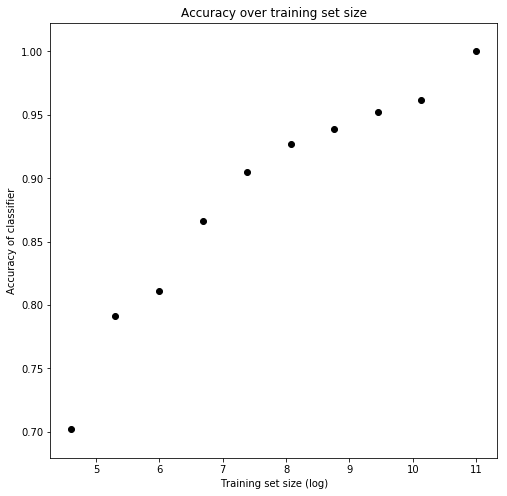

In [0]:
# Apply log(train_sizes) and log(pred_size), to control for exponential increase
def P4(pred_size):
    x = np.asarray(np.log(train_sizes)).reshape(-1,1)
    y = np.asarray(accuracies).reshape(-1,1)
    # Fit linear model to data
    reg = LinearRegression()
    reg.fit(x, y)
    print("Slope coefficient of estimator: {}".format(reg.coef_))
    print("R2 score: {}".format(reg.score(x, y)))
    # Predict regressand
    prediction = reg.predict(np.array([[np.log(pred_size)]]))
    print("Prediction for n={}: {}".format(pred_size, prediction))
    # Cap accuracy value at max 1
    if prediction > 1:
      prediction = 1
    print("Prediction for n={} (capped): {}".format(pred_size, prediction))
    
    x = np.append(x, np.log(pred_size))
    y = np.append(y, prediction)
            
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.title("Accuracy over training set size")
    plt.xlabel("Training set size (log)")
    plt.ylabel("Accuracy of classifier")
    plt.scatter(x, y, color='black')
    plt.show()
    
                   
P4(60000)

ANSWER: The regression output returns values greater than 1, which is not feasible given that accuracy can not exceed 1. To control for the exponential relationship with regard to the training set size, we apply a log transformation to the training set size, which also significantly improves the model fit (R2). Still, for training set sizes around 60k, the predictor outputs values slightly above 1. Since we do not know at which threshold the predictor converges to accuracy 1, I have decided to cap the accuracy at 1.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [0]:
def P5():

### STUDENT START ###

  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(mini_train_data, mini_train_labels)
  dev_pred = neigh.predict(dev_data)
  print("\n\nConfusion matrix for classifier KNN (k=1)")
  print(confusion_matrix(dev_labels, dev_pred))  

    
### STUDENT END ###

P5()



Confusion matrix for classifier KNN (k=1)
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


From the confusion matrix we can see that:
*   '4' is often misclassified as '9'
*   '9' is often misclassified as '7'
*   '2' is often misclassified as '8'
*   '3' is often misclassified as '5'

So '4' and '9' are the most confused pair of digits.




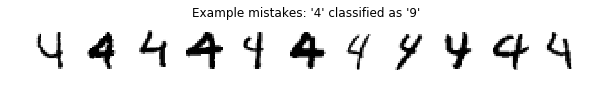

In [0]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(mini_train_data, mini_train_labels)
dev_pred = neigh.predict(dev_data)

cl_a = "4"
cl_b = "9"
X_aa = dev_data[(dev_labels == cl_a) & (dev_pred == cl_b)]


images = [item.reshape(28,28) for item in X_aa]
row_images = [] 
# Data selection and transformation for visualization
for row in range(1):
  rimages = images[0 : 11]
  row_images.append(np.concatenate(rimages, axis = 1))    
image = np.concatenate(row_images, axis = 0) 
plt.figure(figsize=(10,8))
plt.title("Example mistakes: '4' classified as '9'")
plt.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')
plt.axis('off')
pass




(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

(-0.5, 55.5, 27.5, -0.5)

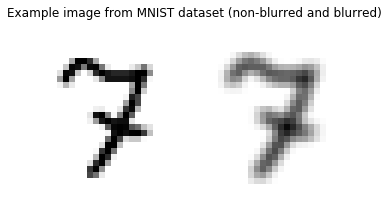

In [0]:
# def P6():
    
### STUDENT START ###

def blur(image):
  # Define box blur image processing kernel (1/9 * [3,3] matrix)
  kernel = np.ones((3,3), dtype="float32") / 9
  # Add additional border to allow kernel processing
  border = 1
  (rows , columns) = image.shape
  (rows, columns) = (rows + 2*border, columns + 2*border)
  # Create extended array to fit original image incl. border
  image_raw = np.zeros((rows, columns), dtype="float32")
  image_raw[border: border+image.shape[0], border: border+image.shape[1]] = image
  # Create empty array to fit blurred image  
  blurred_image = np.zeros((image.shape), dtype="float32")
  # Apply filter across all rows and columns of image_raw
  for row in np.arange(border, rows-1):
    for column in np.arange(border, columns-1):
      mask_area = image_raw[row - border : row + 2 * border, column - border : column + 2 * border]
      # The magic happens: kernel is applied to mask_area, resulting in a convolution operation
      convolution = (mask_area * kernel).sum()
      # Convoluted mask_area is copied into image
      blurred_image[row - border, column - border] = convolution        
  return blurred_image

# Create a copy of the mini train data
mini_train_copy = np.copy(mini_train_data)
# Select examples for display
mini_train_example = mini_train_copy[100].reshape(28,28)
blurred_mini_train_example = blur(mini_train_copy[100].reshape(28,28))

# Plot examples
image_comparison = np.concatenate((mini_train_example, blurred_mini_train_example), axis = 1)
plt.imshow(image_comparison, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Example image from MNIST dataset (non-blurred and blurred)")
plt.axis('off')

### STUDENT END ###

# P6()

In [0]:
# Apply blur function to all mini data set entries
blurred_mini_train = [blur(image.reshape(28,28)).flatten() for image in mini_train_copy]
# Apply blur functio to all dev data
blurred_dev_data = [blur(image.reshape(28,28)).flatten() for image in dev_data]

# Calculate accuracies for KNN with non-blurred and blurred data
# Fit classifier KNN with k=1
def fit(train_data, train_labels, test_data, test_labels):
  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(train_data, train_labels)
  # Calculate accuracy score
  score = neigh.score(test_data, test_labels)
  return score

print("Accuracy (non-blurred mini train, non-blurred dev data): {}".format( 
      fit(mini_train_data, mini_train_labels, dev_data, dev_labels)))

print("Accuracy (blurred mini train, non-blurred dev data): {}".format( 
      fit(blurred_mini_train, mini_train_labels, dev_data, dev_labels)))

print("Accuracy (non-blurred mini train, blurred dev data): {}".format(
      fit(mini_train_data, mini_train_labels, blurred_dev_data, dev_labels)))

print("Accuracy (blurred mini train, blurred dev data): {}".format( 
      fit(blurred_mini_train, mini_train_labels, blurred_dev_data, dev_labels)))

Accuracy (non-blurred mini train, non-blurred dev data): 0.884
Accuracy (blurred mini train, non-blurred dev data): 0.907
Accuracy (non-blurred mini train, blurred dev data): 0.868
Accuracy (blurred mini train, blurred dev data): 0.905


ANSWER: The accuracy of the classifier using the blurred training and non-blurred test data set is the highest (0.907). In general, training the classifier on blurred images is advantageous, indicating that the smoothing might reduce noise which improves the result on new examples.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [0]:
def P7():

### STUDENT START ###
  # Fitting a Naive Bayes classifier
  gnb = GaussianNB()
  gnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Gaussian Naive Bayes on dev data: {}".format(gnb.score(dev_data, dev_labels)))

    
### STUDENT END ###

P7()

Accuracy score of Gaussian Naive Bayes on dev data: 0.593


In [0]:
def PBernoulli():

### STUDENT START ###
  # Fitting Bernoulli Naive Bayes classifier, setting threshold for binarization to 0.5
  bnb = BernoulliNB(binarize=0.5)
  bnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Bernoulli Naive Bayes on dev data (binarization threshold = 0.5): {}"\
        .format(bnb.score(dev_data, dev_labels)))

    
### STUDENT END ###

PBernoulli()

Accuracy score of Bernoulli Naive Bayes on dev data (binarization threshold = 0.5): 0.819


In [0]:
### STUDENT START ###

def PMultinomialNB():
  # Fitting a Multinomial Naive Bayes Classifier
  mnb = MultinomialNB()
  mnb.fit(mini_train_data_2, mini_train_labels)
  # Reporting accuracy on the binarized dev data
  print("Accuracy score of Multinomial Naive Bayes on dev data (binarization thresholds = 0.0, 1.0, 2.0): {}"\
        .format(mnb.score(dev_data_2, dev_labels)))
    
# Binarization preprocessing
mini_train_data_2 = np.copy(mini_train_data)
dev_data_2 = np.copy(dev_data)

def binarize(data):
  # All normalized greyscale values >0.9 count as "black"
  data[np.where(data > 0.9)] = 2
  # The remaining non-zero pixel values count as "grey"
  data[np.where((data > 0.0) & (data <= 0.9))] = 1
  return data

mini_train_data_2 = binarize(mini_train_data_2)
dev_data_2 = binarize(dev_data_2)

### STUDENT END ###

PMultinomialNB()

Accuracy score of Multinomial Naive Bayes on dev data (binarization thresholds = 0.0, 1.0, 2.0): 0.803


ANSWER: 
  * The binarized Bernoulli Naive Bayes classifier performs better than the Gaussian Naive Bayes classifier. Apparently, the classification profits from a classifier which just distinguished between black (or grey) and white pixel values.
  * The Multinomial Naive Bayes classifier (where I classified black as the normalized pixel values >0.9, and grey as the non-zero remainder) does not improve accuracy. Apparently the redistribution of the probabilites towards "grey pixel" information is not helpful for improving the classfier result. One reason for that might originate from the dataset itself, as for the identification of handwritten digits a single distinction between black and white might be sufficient (and grey values might be random artefacts, e.g. of illumination etc.)

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [0]:
def P8(alphas):

### STUDENT START ###
  param_grid = [{'alpha': alphas['alpha']}]
  bnb = BernoulliNB()
  grid_search = GridSearchCV(bnb, param_grid, cv=5, return_train_score=False)
  grid_search.fit(mini_train_data, mini_train_labels)
  return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print("Best estimator = {}".format(nb.best_estimator_))
print("Best parameter setting = {}".format(nb.best_params_))
print("Best accuracy score: {}".format(nb.best_score_))

# print("\nAll test results: {}".format(nb.cv_results_))

print("\nAccuracy for parameter 'alpha = 0': {}".format(nb.cv_results_['mean_test_score'][0]))

Best estimator = BernoulliNB(alpha=0.001, binarize=0.0, class_prior=None, fit_prior=True)
Best parameter setting = {'alpha': 0.001}
Best accuracy score: 0.825

Accuracy for parameter 'alpha = 0': 0.813


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ANSWER: Laplace smoothing adds "pseudocounts" of observed cases in order to allow for unforeseen events. This makes the prior distribution more uniform compared to the non-smoothed alternative. In the case above, the accuracy for alpha = 0 (no smoothing) is slightly lower, indicating that regularization does have a small effect. Our model is better able to generalize to examples which it has not seen before.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [0]:
def P9():

### STUDENT START ###
  # Fitting a Naive Bayes classifier (just to see the baseline)
  gnb = GaussianNB()
  gnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Gaussian Naive Bayes on dev data: {}".format(gnb.score(dev_data, dev_labels)))
  return gnb

### STUDENT END ###

gnb = P9()
# print("Theta (mean of each feature per class) of Gaussian Naive Bayes Classifier: {}".format(gnb.theta_))
# print("Sigma (variance of feature per class) of Gaussian Naive Bayes Classifier: {}".format(gnb.sigma_))
# print("Class count (# training samples for each class): {}".format(gnb.class_count_))
# print("Probability of each class: {}".format(gnb.class_prior_))

Accuracy score of Gaussian Naive Bayes on dev data: 0.593


In [0]:
def P9(smoothing_params_):

### STUDENT END ###
  # Performing grid search on the best smoothing parameters for the NB classifier
  param_grid = [{'var_smoothing': smoothing_params}]
  gnb = GaussianNB()
  grid_search = GridSearchCV(gnb, param_grid, cv=5, return_train_score=False)
  grid_search.fit(dev_data, dev_labels)
  return grid_search

### STUDENT END ###

smoothing_params = [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]

gnb = P9(smoothing_params)
print("Best estimator = {}".format(gnb.best_estimator_))
print("Best parameter setting = {}".format(gnb.best_params_))
print("Best accuracy score: {}".format(gnb.best_score_))

Best estimator = GaussianNB(priors=None, var_smoothing=0.1)
Best parameter setting = {'var_smoothing': 0.1}
Best accuracy score: 0.788


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
def P9():
  
  # Fitting a Naive Bayes classifier with the smoothing parameter from grid search above
  gnb = GaussianNB(var_smoothing=0.1)
  gnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Gaussian Naive Bayes on dev data (with optimized smoothing): {}".format(gnb.score(dev_data, dev_labels)))
  return gnb

P9()


Accuracy score of Gaussian Naive Bayes on dev data (with optimized smoothing): 0.817


GaussianNB(priors=None, var_smoothing=0.1)

ANSWER: Looking at the parameter sigma, we find that the variance in the feature per class is extremely low, which negatively affects the classifier. Therefore, we apply smoothing. Using grid search to find the best parameter for smoothing (var_smoothing = 0.1), we were able to increase the accuracy score on the dev set from 0.59 to 0.82. Also for the naive bayes classifier, the addition of regularization allows the classifier to generalize better to new unseen examples.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

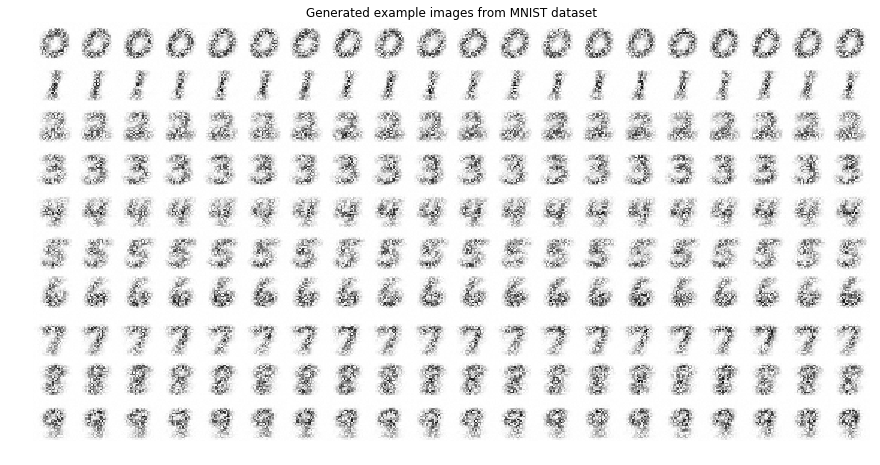

In [0]:
def P10(num_examples):

### STUDENT START ###

  # Fitting Bernoulli Naive Bayes classifier, setting threshold for binarization to 0.5
  bnb = BernoulliNB()
  bnb.fit(mini_train_data, mini_train_labels)
  # Extracting p-values of the classifier
  p = np.exp(bnb.feature_log_prob_)
  row_images = []  
     
  for example in range(num_examples):
    # Create an array of random numbers from a uniform distribution
    random_numbers = np.random.rand(10,784)
    # Multiply random numbers by p-values of the classifier (generative model)
    probability_densities = p * random_numbers
    # Reshape to 28x28 pixel shape for image display
    images = [item.reshape(28,28) for item in probability_densities]
    # Create rows and columns for image display
    for row in range(10):    
      if row == 0:
        row_images = images[0]
      else:
        row_images = np.concatenate((row_images, images[row]), axis = 0)    
    if example == 0:
      image = row_images
    else:
      image = np.concatenate((image, row_images), axis = 1)
      
  plt.figure(figsize=(15,15))
  plt.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')
  plt.title("Generated example images from MNIST dataset")
  plt.axis('off')
  return

### STUDENT END ###

P10(20)

ANSWER: The generated images contain a lot of noise in the outer areas of the 28x28 pixel grid, due to the fact that the randomly generated numbers of the uniform distribution sometimes fall under the (small) p-values of these pixels. The images might look better to the eye when applying a sharpening filter, so that the dots appear more like lines. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [0]:
def P11(buckets, correct, total):
    
### STUDENT START ###

  # Fitting Bernoulli Naive Bayes classifier
  bnb = BernoulliNB(alpha=0.001, binarize=0.5)
  bnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Bernoulli Naive Bayes on dev data: {}"\
        .format(bnb.score(dev_data, dev_labels)))
  
  # predict.proba() returns posterior probabilities of classification according to each class on an array of test vectors X
  predicted_posterior = bnb.predict_proba(dev_data)  
  # Iterating through the predicted posterior probabilities for each class (digits 0-9)
  for i in range(len(predicted_posterior)):
    # For each observation, out of the probabilities for digits 0-9, identify the maximum probability index and maximum probability value
    index_max_proba = np.argmax(predicted_posterior[i])
    max_proba = predicted_posterior[i, index_max_proba]
    # Go through each posterior probability bucket and count total and correct observations
    for j in range(len(buckets)):
      if max_proba <= buckets[j]:
        total[j] = total[j] +1
        # Check if the highest probability matches the correct label (need to convert string to integer)
        if index_max_proba == int(dev_labels[i]):
          correct[j] = correct[j] +1
        # Once we have reached the correct probability bucket, break to avoid double counts
        break    
  return total, correct    
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0.0 for i in buckets]
total = [0.0 for i in buckets]

total, correct = P11(buckets, correct, total)
print("\nTotal number of observations: {}. Correct classifications: {}".format(sum(total), sum(correct)))

print("\n\nProbability buckets:")
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

Accuracy score of Bernoulli Naive Bayes on dev data: 0.828

Total number of observations: 1000.0. Correct classifications: 828.0


Probability buckets:
p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  36    accuracy = 0.389
p(pred) <= 0.9990000000000    total =  90    accuracy = 0.444
p(pred) <= 0.9999900000000    total =  69    accuracy = 0.565
p(pred) <= 0.9999999000000    total =  67    accuracy = 0.672
p(pred) <= 0.9999999990000    total =  50    accuracy = 0.820
p(pred) <= 0.9999999999900    total =  72    accuracy = 0.903
p(pred) <= 0.9999999999999    total =  66    accuracy = 0.894
p(pred) <= 1.0000000000000    total = 550    accuracy = 0.955


ANSWER: 

  * We can see that the accuracy of the predictions significantly decreses for the buckets with lower posterior probabilites. This seems logical, as it reflects the lower uncertainty that the classifier exhibits for the predictions. 
  * For a well calibrated classifier, the posterior probability would come close to the accuracy values (ratio of the correctly predicted labels). We can see that for most of the probability buckets, the classifier seems not to be well calibrated. Only for posterior probabilities between 0.999999999999 and 1, with an accuracy of 0.96, both values seem to converge more closely.
  * Adjusting alpha to higher levels further increases accuracy slightly for the lower bucket (while decreasing it slightly in the higher buckets), reflecting the smoothing effect on the classifier.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [0]:
#def P12():

### STUDENT START ###



### STUDENT END ###

#P12()